In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data.csv", parse_dates = ['NEXT_ARR', 'RESPONSETIMESTAMP', 'last_updated'])
df.rename(columns = {"Unnamed: 0": "INDEX"}, inplace = True)
df.set_index("INDEX", inplace = True)
df['time'] = df['NEXT_ARR'].apply(lambda x: x.value / 1_000_000_000)
df.head(5)

,DESTINATION,DIRECTION,HEAD_SIGN,LINE,NEXT_ARR,STATION,TRAIN_ID,WAITING_SECONDS,WAITING_TIME,RESPONSETIMESTAMP,...,cloud,feelslike_f,vis_miles,uv,gust_mph,I-20 Travel Time,I-85 Travel Time,SF_Event,MB_Event,time
INDEX,,,,,,,,,,,,,,,,,,,,,
0,INDIAN CREEK,E,FIVE POINTS E-W,BLUE,2023-02-17 14:51:40,FIVE POINTS STATION,104,525,8 min,2023-02-17 14:36:42,...,25.0,36.6,9.0,2.0,19.0,16.0,27.0,0.0,0.0,1.676646e+09
1,INDIAN CREEK,E,EAST LAKE,BLUE,2023-02-17 15:02:40,EAST LAKE STATION,104,1183,19 min,2023-02-17 14:36:42,...,25.0,36.6,9.0,2.0,19.0,16.0,27.0,0.0,0.0,1.676646e+09
2,INDIAN CREEK,E,DOME,BLUE,2023-02-17 14:50:40,DOME STATION,104,466,7 min,2023-02-17 14:36:42,...,25.0,36.6,9.0,2.0,19.0,16.0,27.0,0.0,0.0,1.676645e+09
3,INDIAN CREEK,E,DECATUR,BLUE,2023-02-17 15:05:40,DECATUR STATION,104,1363,22 min,2023-02-17 14:36:42,...,25.0,36.6,9.0,2.0,19.0,16.0,27.0,0.0,0.0,1.676646e+09
4,INDIAN CREEK,E,CANDLER PARK,BLUE,2023-02-17 14:59:40,CANDLER PARK STATION,104,1004,16 min,2023-02-17 14:36:42,...,25.0,36.6,9.0,2.0,19.0,16.0,27.0,0.0,0.0,1.676646e+09


In [3]:
y = df['DELAYSECONDS']
x_cols = ['temp_f', 'condition', 'wind_mph', 'wind_degree', 'wind_dir', 'pressure_mb', 
       'precip_in', 'humidity', 'cloud', 'feelslike_f', 'gust_mph', 'I-20 Travel Time', 'I-85 Travel Time',
       'STATION', 'LINE', 'TRAIN_ID']
X = df[x_cols]
X.head()


,temp_f,condition,wind_mph,wind_degree,wind_dir,pressure_mb,precip_in,humidity,cloud,feelslike_f,gust_mph,I-20 Travel Time,I-85 Travel Time,STATION,LINE,TRAIN_ID
INDEX,,,,,,,,,,,,,,,,
0,44.1,Partly cloudy,15.0,290.0,WNW,1019.0,0.0,62.0,25.0,36.6,19.0,16.0,27.0,FIVE POINTS STATION,BLUE,104
1,44.1,Partly cloudy,15.0,290.0,WNW,1019.0,0.0,62.0,25.0,36.6,19.0,16.0,27.0,EAST LAKE STATION,BLUE,104
2,44.1,Partly cloudy,15.0,290.0,WNW,1019.0,0.0,62.0,25.0,36.6,19.0,16.0,27.0,DOME STATION,BLUE,104
3,44.1,Partly cloudy,15.0,290.0,WNW,1019.0,0.0,62.0,25.0,36.6,19.0,16.0,27.0,DECATUR STATION,BLUE,104
4,44.1,Partly cloudy,15.0,290.0,WNW,1019.0,0.0,62.0,25.0,36.6,19.0,16.0,27.0,CANDLER PARK STATION,BLUE,104


In [4]:
new_df = df[df['DELAYSECONDS'] < 60].copy()

new_y = new_df['DELAYSECONDS']
new_X = new_df[x_cols]
new_X.head()

,temp_f,condition,wind_mph,wind_degree,wind_dir,pressure_mb,precip_in,humidity,cloud,feelslike_f,gust_mph,I-20 Travel Time,I-85 Travel Time,STATION,LINE,TRAIN_ID
INDEX,,,,,,,,,,,,,,,,
0,44.1,Partly cloudy,15.0,290.0,WNW,1019.0,0.0,62.0,25.0,36.6,19.0,16.0,27.0,FIVE POINTS STATION,BLUE,104
1,44.1,Partly cloudy,15.0,290.0,WNW,1019.0,0.0,62.0,25.0,36.6,19.0,16.0,27.0,EAST LAKE STATION,BLUE,104
2,44.1,Partly cloudy,15.0,290.0,WNW,1019.0,0.0,62.0,25.0,36.6,19.0,16.0,27.0,DOME STATION,BLUE,104
3,44.1,Partly cloudy,15.0,290.0,WNW,1019.0,0.0,62.0,25.0,36.6,19.0,16.0,27.0,DECATUR STATION,BLUE,104
4,44.1,Partly cloudy,15.0,290.0,WNW,1019.0,0.0,62.0,25.0,36.6,19.0,16.0,27.0,CANDLER PARK STATION,BLUE,104


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay

In [6]:
transform_columns = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include = np.number)),
    (OneHotEncoder(), ['condition', 'wind_dir', 'STATION', 'LINE', 'TRAIN_ID']),
    remainder = 'passthrough'
)

In [7]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import LinearSVR
from sklearn import linear_model

reg1 = linear_model.PoissonRegressor(solver="newton-cholesky", max_iter = 1000)
reg2 = LinearSVR()
reg3 = LinearRegression()
reg4 = GradientBoostingRegressor()
ereg = VotingRegressor(estimators=[('poi', reg1), ('svr', reg2), ('lr', reg3), ('gb', reg4)])

model_pipeline = make_pipeline(
    transform_columns,
    # PoissonRegressor(solver = 'newton-cholesky', max_iter = 1000)
    ereg
    # LinearRegression()
    # GradientBoostingRegressor()
)

In [8]:
model_pipeline.fit(new_X, new_y)
pred = model_pipeline.predict(new_X)
print(np.sqrt(mean_squared_error(new_y, pred)))
pd.DataFrame(data = {"actual": new_y, "pred": pred})

18.519183668302983


,actual,pred
INDEX,,
0,0.0,8.439721
1,0.0,8.268419
2,0.0,8.188735
3,0.0,7.937603
4,0.0,8.162268
...,...,...
263330,56.0,8.855607
263331,56.0,8.601904
263332,56.0,8.692987


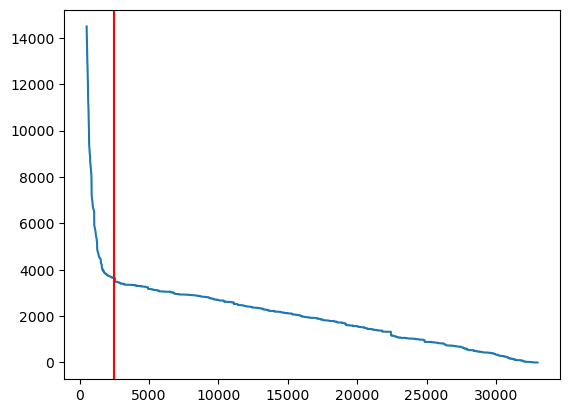

In [9]:
d = []
index = []
for i in range(500, 33000, 10):
    d.append(len(y[y > i]))
    index.append(i)
sns.lineplot(x = index, y = d)
plt.axvline(2500, color = 'r')

In [10]:
threshold = 60

high_y = df['DELAYSECONDS'].copy()
x_cols = ['temp_f', 'condition', 'wind_mph', 'wind_degree', 'wind_dir', 'pressure_mb', 
       'precip_in', 'humidity', 'cloud', 'feelslike_f', 'gust_mph', 'I-20 Travel Time', 'I-85 Travel Time',
       'STATION', 'LINE', 'TRAIN_ID']
high_X = df[x_cols]

high_y[high_y < threshold] = 0
high_y[high_y >= threshold] = 1
print("Number of Observations:")
print("(0: < 60s and 1: >= 60s)")
high_y.value_counts()

Number of Observations:
(0: < 60s and 1: >= 60s)


0.0    143385
1.0    119980
Name: DELAYSECONDS, dtype: int64

In [11]:
transform_columns_cls = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include = np.number)),
    (OneHotEncoder(), ['condition', 'wind_dir', 'STATION', 'LINE', 'TRAIN_ID']),
    remainder = 'passthrough'
)

In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from imblearn.ensemble import RUSBoostClassifier
from imblearn.over_sampling import SMOTE, KMeansSMOTE

from imblearn.pipeline import Pipeline

model_pipeline_cls = Pipeline(steps = [
    ("cols", transform_columns_cls),
    ("model", GradientBoostingClassifier(n_estimators = 1000, max_depth = 7))
])

In [13]:
model_pipeline_cls.fit(high_X, high_y)
pred_cls = model_pipeline_cls.predict(high_X)
print(accuracy_score(high_y, pred_cls))
print(f1_score(high_y, pred_cls))

0.8738746606420746
0.8550406507613018


In [14]:
confusion_matrix(high_y, pred_cls)

array([[132183,  11202],
       [ 22015,  97965]])

In [17]:
model_pipeline_cls.fit(high_X, high_y)
pred_cls = model_pipeline_cls.predict(high_X)
print(accuracy_score(high_y, pred_cls))
print(f1_score(high_y, pred_cls))

0.8740796992766693
0.855481908546975


In [15]:
print("Gradient Boosting Classifier")
print("(n_estimators = 1000, max_depth = 7)")
print("Accuracy: 0.8747175972509635")
print("F1 Score: 0.8562766527422649")

Gradient Boosting Classifier
(n_estimators = 1000, max_depth = 7)
Accuracy: 0.8747175972509635
F1 Score: 0.8562766527422649


In [19]:
ConfusionMatrixDisplay(confusion_matrix(high_y, pred_cls))

In [82]:
onehot_columns = model_pipeline_cls.named_steps['cols'].named_transformers_['onehotencoder'].get_feature_names_out()
numerical_columns = high_X.columns[high_X.dtypes != 'object'].tolist()

In [83]:
s = np.array(numerical_columns + list(onehot_columns))
len(s) == len(model_pipeline_cls.steps[1][1].feature_importances_)

True

In [69]:
feature_importance = pd.Series(data=model_pipeline_cls.steps[1][1].feature_importances_, index = s)

In [81]:
feature_importance[feature_importance > .05]

pressure_mb         0.055869
humidity            0.065075
feelslike_f         0.067319
gust_mph            0.092659
I-85 Travel Time    0.099355
TRAIN_ID            0.155282
dtype: float64

In [88]:
feature_importance[feature_importance < .0001]

condition_Fog                                    0.000083
condition_Moderate or heavy rain with thunder    0.000039
STATION_INMAN PARK STATION                       0.000096
STATION_KING MEMORIAL STATION                    0.000081
STATION_PEACHTREE CENTER STATION                 0.000065
STATION_WEST END STATION                         0.000091
dtype: float64